In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta al archivo en Drive
ruta_archivo = '/content/drive/My Drive/IA/data.csv'

# Leer un archivo CSV desde Google Drive
df = pd.read_csv(ruta_archivo)
print(df.head())


   mora  atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro  ingreso  \
0     0     235  FAMILIAR    30      3748    93.0             5   3500.0   
1     0      18  FAMILIAR    32      4598     9.0            12    900.0   
2     0       0  FAMILIAR    26      5148     8.0             2   2400.0   
3     0       0  FAMILIAR    36      5179    20.0            12   2700.0   
4     0       0  FAMILIAR    46      3960     NaN             1   3100.0   

   linea_sf  deuda_sf  score         zona  clasif_sbs     nivel_educ  
0       NaN      0.00    214         Lima           4  UNIVERSITARIA  
1   1824.67   1933.75    175  La Libertad           1        TECNICA  
2   2797.38    188.29    187         Lima           0  UNIVERSITARIA  
3       NaN      0.00    187       Ancash           0        TECNICA  
4   2000.00  11010.65    189         Lima           0        TECNICA  


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/My Drive/IA/data.csv')

In [ ]:
# Imputación de datos faltantes

# Identificar las columnas con datos faltantes
columnas_con_datos_faltantes = data.columns[data.isnull().any()].tolist()
print("Columnas con datos faltantes:", columnas_con_datos_faltantes)

# Imputar datos faltantes en variables numéricas con el valor medio
variables_numericas = ['edad', 'dias_lab', 'exp_sf', 'ingreso', 'linea_sf', 'deuda_sf', 'score']
for variable in variables_numericas:
    if variable in columnas_con_datos_faltantes:
        data.loc[:, variable] = data[variable].fillna(data[variable].mean())

# Imputar datos faltantes en variables categóricas con el valor más frecuente
variables_categoricas = ['vivienda', 'nivel_educ', 'zona', 'clasif_sbs']
for variable in variables_categoricas:
    if variable in columnas_con_datos_faltantes:
        data.loc[:, variable] = data[variable].fillna(data[variable].value_counts().index[0])

# Verificar que no haya datos faltantes
print("Datos faltantes después de la imputación:")
print(data.isnull().sum())

# Guardar el archivo data_imputado.csv con los datos imputados
data.to_csv('data_imputado.csv', index=False)

Columnas con datos faltantes: ['exp_sf', 'linea_sf', 'deuda_sf']
Datos faltantes después de la imputación:
mora            0
atraso          0
vivienda        0
edad            0
dias_lab        0
exp_sf          0
nivel_ahorro    0
ingreso         0
linea_sf        0
deuda_sf        0
score           0
zona            0
clasif_sbs      0
nivel_educ      0
dtype: int64


In [ ]:
# Librerías
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
# Cargar el dataset
data = pd.read_csv('data_imputado.csv')

In [ ]:
# Modelo de Predicción de Probabilidad de Fraude

# Definir la variable objetivo (fraude)
# Como no hay una variable explícita para fraude, utilizaremos una combinación de variables
data['fraude'] = (data['mora'] > 0) | (data['atraso'] > 0)
#%%
# Seleccionar las variables predictoras
X = data.drop(['fraude', 'mora', 'atraso'], axis=1)
y = data['fraude']

# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, columns=['vivienda', 'nivel_educ', 'zona', 'clasif_sbs'])

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#%%
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Definir un modelo de Random Forest con hiperparámetros a ajustar
model = RandomForestClassifier(random_state=42)

# Definir un grid de hiperparámetros a probar
param_grid = {
 'n_estimators': [100, 200, 300, 400, 500],
 'max_depth': [None, 5, 10, 15],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 5, 10]
}

#--------------------------------------------------------------------------
# Realizar una búsqueda en grid para encontrar los mejores hiperparámetros
# Toma una 1hr con el acelerador TPU VM v3-8
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
#--------------------------------------------------------------------------

#%%
# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Utilizar los mejores hiperparámetros para entrenar un modelo
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predecir los valores de fraude para el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}
Precisión: 0.8767857142857143
Informe de clasificación:
              precision    recall  f1-score   support

       False       0.88      0.55      0.68       395
        True       0.88      0.98      0.92      1285

    accuracy                           0.88      1680
   macro avg       0.88      0.76      0.80      1680
weighted avg       0.88      0.88      0.87      1680

Matriz de confusión:
[[ 218  177]
 [  30 1255]]


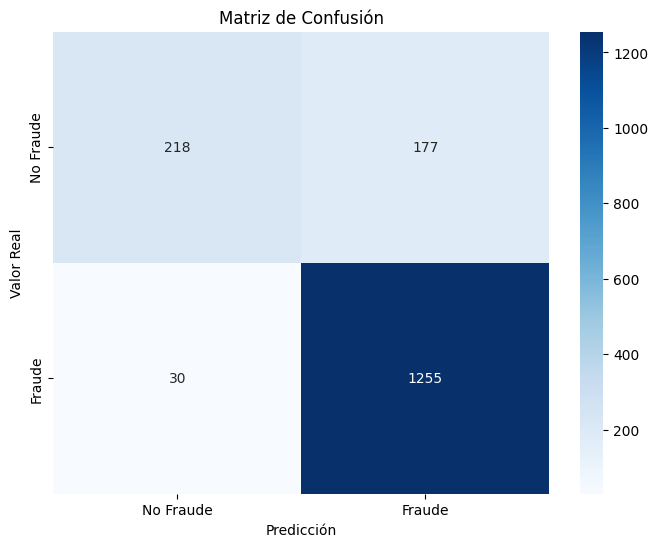

In [ ]:
# prompt: codigo para mostrar una matriz de confusion con los datos del anterior codigo

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (Your existing code) ...

# Assuming 'y_test' and 'y_pred' are defined from your model prediction

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Fraude', 'Fraude'],
            yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

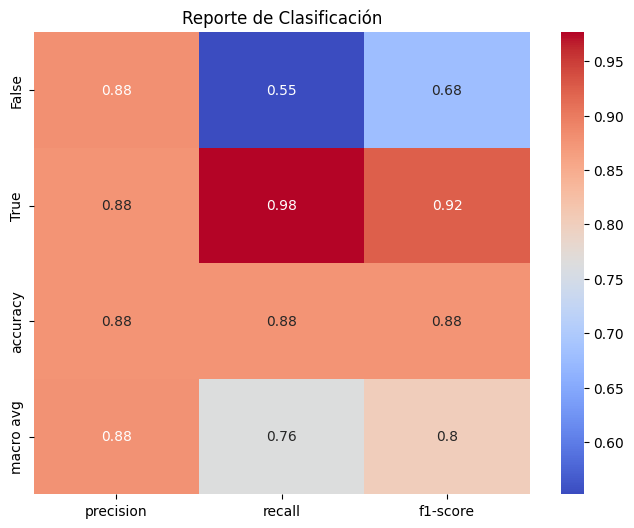

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Graficar el reporte de clasificación
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm')
plt.title('Reporte de Clasificación')
plt.show()



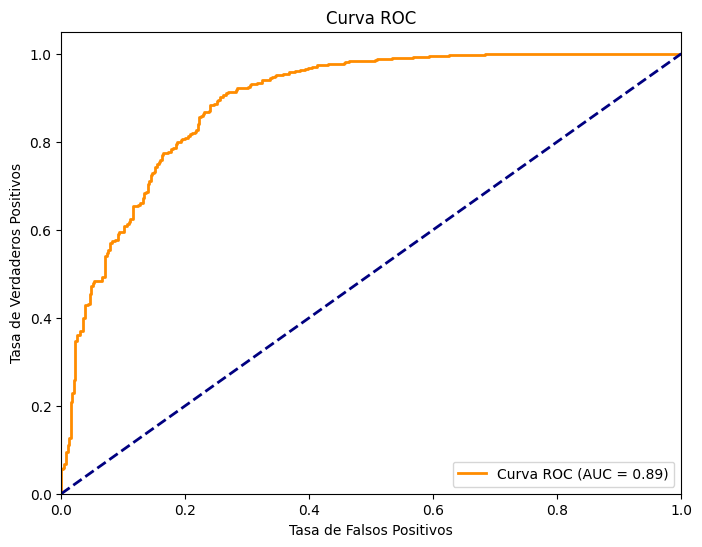

In [ ]:
# prompt: hazme una Curva ROC y AUC para mostrar con los datos anteriores

from sklearn.metrics import roc_curve, auc

# ... (Your existing code) ...

# Obtener las probabilidades de predicción para la clase positiva (fraude)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Ingresar nuevo registro para predecir la probabilidad de fraude
# Cargar las librerías necesarias

from sklearn.preprocessing import StandardScaler

# Cargar el scaler y el pca entrenados anteriormente
scaler = StandardScaler()
scaler.fit(X)

# Cargar el pca entrenado anteriormente
pca = PCA(n_components=0.95)
pca.fit(scaler.transform(X))

# Crear un nuevo registro con la información del individuo
nuevo_registro = pd.DataFrame({
 'edad': [50],
 'dias_lab': [500],
 'exp_sf': [10],
 'ingreso': [700],
 'deuda_sf': [10000],
 'score': [350],
 'vivienda': ['FAMILIAR'],
 'nivel_educ': ['UNIVERSITARIA'],
 'zona': ['Lima'],
 'clasif_sbs': [0]
})

# Convertir variables categóricas a numéricas
nuevo_registro = pd.get_dummies(nuevo_registro, columns=['vivienda', 'nivel_educ', 'zona', 'clasif_sbs'])

# Asegurarse de que las columnas coincidan con las del conjunto de entrenamiento
nuevo_registro = nuevo_registro.reindex(columns=X.columns, fill_value=0)

# Escalar el nuevo registro
nuevo_registro_scaled = scaler.transform(nuevo_registro)

# Aplicar PCA al nuevo registro
nuevo_registro_pca = pca.transform(nuevo_registro_scaled)

# Predecir la probabilidad de fraude
probabilidad_fraude = best_model.predict_proba(nuevo_registro_pca)[:, 1]

print('Probabilidad de fraude:', probabilidad_fraude)

Probabilidad de fraude: [0.7563125]
